In [1]:
import pandas as pd

df = pd.read_csv('data/TotalCPI_2019-4-29_0910.csv')
df

,date,sum
0,2019-04-29,265.787234
1,2019-04-28,266.475000
2,2019-04-27,266.000000
3,2019-04-26,268.246914
4,2019-04-25,263.211765
5,2019-04-24,261.768293
6,2019-04-23,265.469880
7,2019-04-22,265.080460
8,2019-04-21,265.000000
9,2019-04-20,265.279070


In [24]:
df['diff'] = df.sort_values(by=['date'])['sum'].diff().values[::-1]

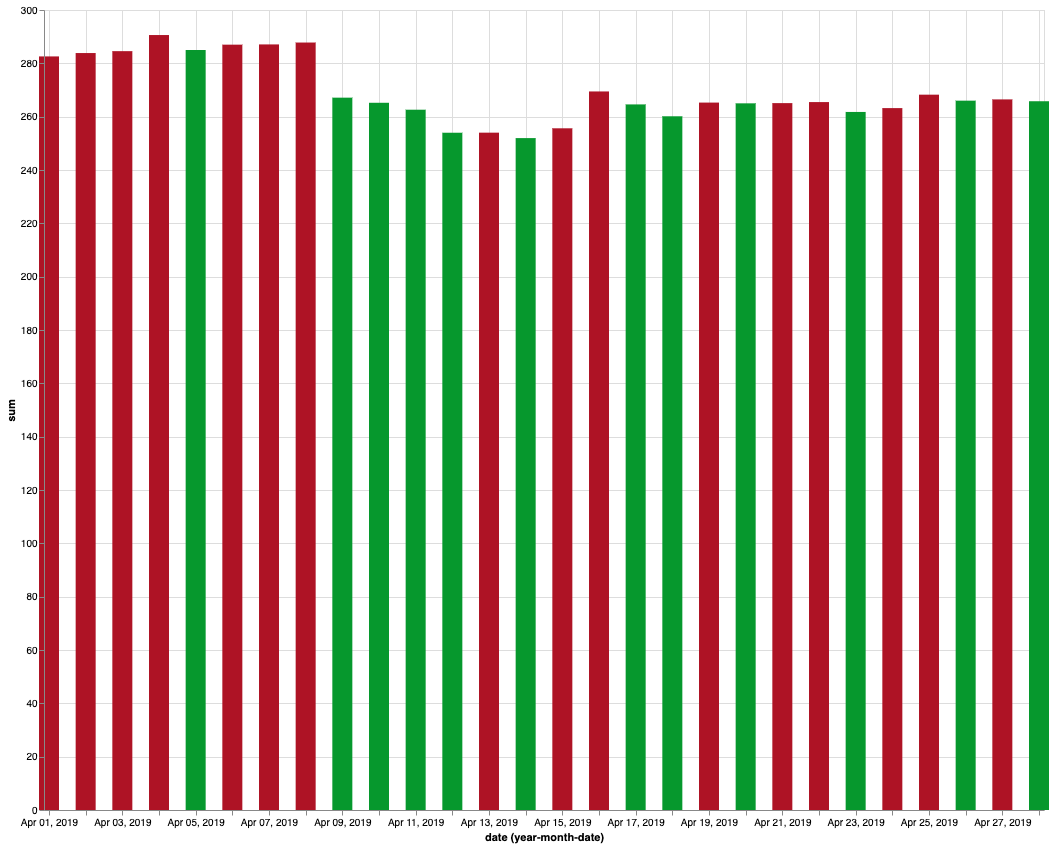

In [44]:
import altair as alt
alt.renderers.enable('notebook')

open_close_color = alt.condition("datum.diff < 0",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

rule = alt.Chart(df.query("date > '2019-04-01'"), width=1000, height=800).mark_rule().encode(
    alt.X(
        'yearmonthdate(date):T',
        scale=alt.Scale(domain=[{"month": 1, "date": 29, "year": 2019},
                                {"month": 4, "date": 29, "year": 2019}]),
        axis=alt.Axis(format='%m/%d', title='Date in 2019')
    ),
    alt.Y(
        'sum',
        title='Count',
        scale=alt.Scale(zero=False),
    ),
    color=open_close_color
)

bar = alt.Chart(df.query("date > '2019-04-01'"), width=1000, height=800).mark_bar(size=20).encode(
    x='yearmonthdate(date):T',
    y='sum',
    color=open_close_color
)

bar

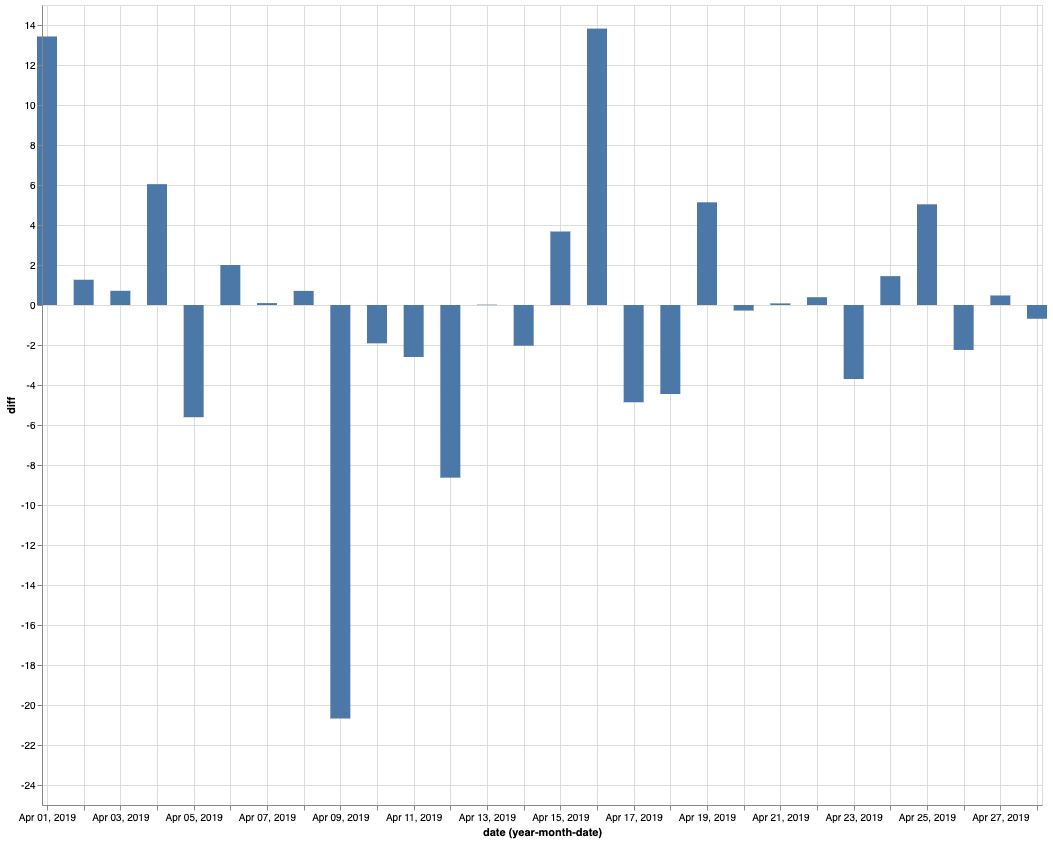

In [45]:
bar = alt.Chart(df.query("date > '2019-04-01'"), width=1000, height=800).mark_bar(size=20).encode(
    x='yearmonthdate(date):T',
    y='diff',
)

bar